Проверь, установлена ли библиотека pandas.

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [2]:
df = pd.read_csv('transactions_diy.csv')
df['tr_date'] = pd.to_datetime(df['tr_date'], format='mixed', dayfirst=True)

Напиши код на Python для загрузки CSV файла 'transactions_diy.csv' в DataFrame при помощи pandas. Датасет содержит транзакции продаж с колонками: tr_date,bcode,client,item,item_group,quantity,amount. Убедись, что колонка Date преобразована в тип datetime. Выведи первые 5 строк и основную информацию о датасете.

In [3]:
import pandas as pd

# Загрузка CSV файла в DataFrame
df = pd.read_csv('transactions_diy.csv')
# Приведение формата даты
df['tr_date'] = pd.to_datetime(df['tr_date'], format='mixed', dayfirst=True)

# Преобразование колонки 'tr_date' в тип datetime
df['tr_date'] = pd.to_datetime(df['tr_date'])

# Вывод первых 5 строк
print("Первые 5 строк:")
print(df.head())

# Вывод основной информации о датасете
print("\nИнформация о датасете:")
print(df.info())


Первые 5 строк:
     tr_date          bcode       client      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   

                     item_group  quantity  amount  
0              Скобяные изделия         1      29  
1  Оборудование для сада и дачи         1     329  
2                   Инструменты         1     169  
3                   Инструменты         2     578  
4              Скобяные изделия         1     329  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008688 entries, 0 to 1008687
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   tr_date     1008688 non-null  datetime64[ns]
 1   bcode       1008688 non-null  object        
 2   client

Проведи статистический анализ DataFrame с продажами:
1. Выведи общую информацию: количество строк, столбцов, типы данных
2. Рассчитай описательную статистику для всех числовых колонок (quantity, amount): min, max, mean, std, median, 25%, 75%
3. Проверь наличие пропущенных значений
4. Для каждого числового столбца выведи уникальных значений и их диапазоны

In [4]:
import pandas as pd

# Предполагается, что df уже загружен и tr_date преобразован
# df = pd.read_csv('transactions_diy.csv')
# df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', dayfirst=True)

# ========================================
# 1. Общая информация о DataFrame
# ========================================
print("1. ОБЩАЯ ИНФОРМАЦИЯ")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("\nТипы данных:")
print(df.dtypes)
print("\n" + "="*50)

# ========================================
# 2. Описательная статистика для quantity и amount
# ========================================
print("2. ОПИСАТЕЛЬНАЯ СТАТИСТИКА (quantity, amount)")
numeric_cols = ['quantity', 'amount']
desc_stats = df[numeric_cols].describe()

# Дополним медиану, так как она уже есть в describe()
print(desc_stats)

# Если хочется отдельно выделить:
print(f"\nМедиана:")
for col in numeric_cols:
    print(f"  {col}: {df[col].median():.2f}")
print("\n" + "="*50)

# ========================================
# 3. Проверка пропущенных значений
# ========================================
print("3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ")
missing = df.isnull().sum()
missing = missing[missing > 0]  # только где есть пропуски

if len(missing) == 0:
    print("Пропущенных значений нет.")
else:
    print(missing)
print("\n" + "="*50)

# ========================================
# 4. Уникальные значения и диапазоны для числовых колонок
# ========================================
print("4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ И ДИАПАЗОНЫ (quantity, amount)")

for col in numeric_cols:
    unique_count = df[col].nunique()
    total_count = len(df[col])
    unique_percent = unique_count / total_count * 100
    data_range = df[col].max() - df[col].min()
    
    print(f"\n{col.upper()}:")
    print(f"  Уникальных значений: {unique_count}")
    print(f"  Всего значений: {total_count}")
    print(f"  Процент уникальных: {unique_percent:.2f}%")
    print(f"  Диапазон значений: от {df[col].min()} до {df[col].max()} (размах = {data_range})")
    
    # Пример уникальных значений (если их не слишком много)
    if unique_count <= 20:
        print(f"  Уникальные значения: {sorted(df[col].unique())}")
    else:
        print(f"  Уникальные значения: (более 20, показаны min/max) [{df[col].min()}, ..., {df[col].max()}]")

print("\nАнализ завершён.")


1. ОБЩАЯ ИНФОРМАЦИЯ
Количество строк: 1008688
Количество столбцов: 7

Типы данных:
tr_date       datetime64[ns]
bcode                 object
client                object
item                  object
item_group            object
quantity               int64
amount                 int64
dtype: object

2. ОПИСАТЕЛЬНАЯ СТАТИСТИКА (quantity, amount)
           quantity        amount
count  1.008688e+06  1.008688e+06
mean   2.222474e+00  6.231940e+02
std    5.029007e+00  1.878421e+03
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  5.600000e+01
50%    1.000000e+00  1.500000e+02
75%    2.000000e+00  4.250000e+02
max    1.100000e+03  2.131770e+05

Медиана:
  quantity: 1.00
  amount: 150.00

3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
Пропущенных значений нет.

4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ И ДИАПАЗОНЫ (quantity, amount)

QUANTITY:
  Уникальных значений: 198
  Всего значений: 1008688
  Процент уникальных: 0.02%
  Диапазон значений: от 0 до 1100 (размах = 1100)
  Уникальные значения: (более 20, показаны min/max) [0,

Создай графики для анализа распределения quantity и amount из DataFrame df. Используй sns.histplot с kde=True и sns.boxplot.
Сделай два окна: одно с гистограммами, второе с box plot.

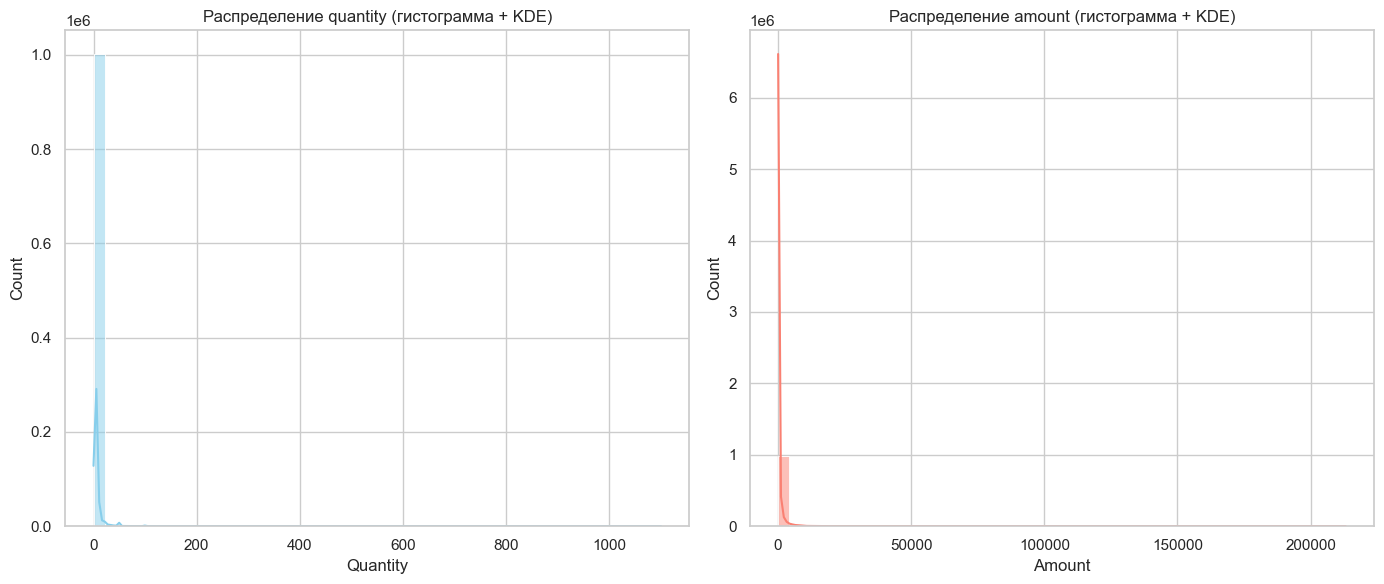

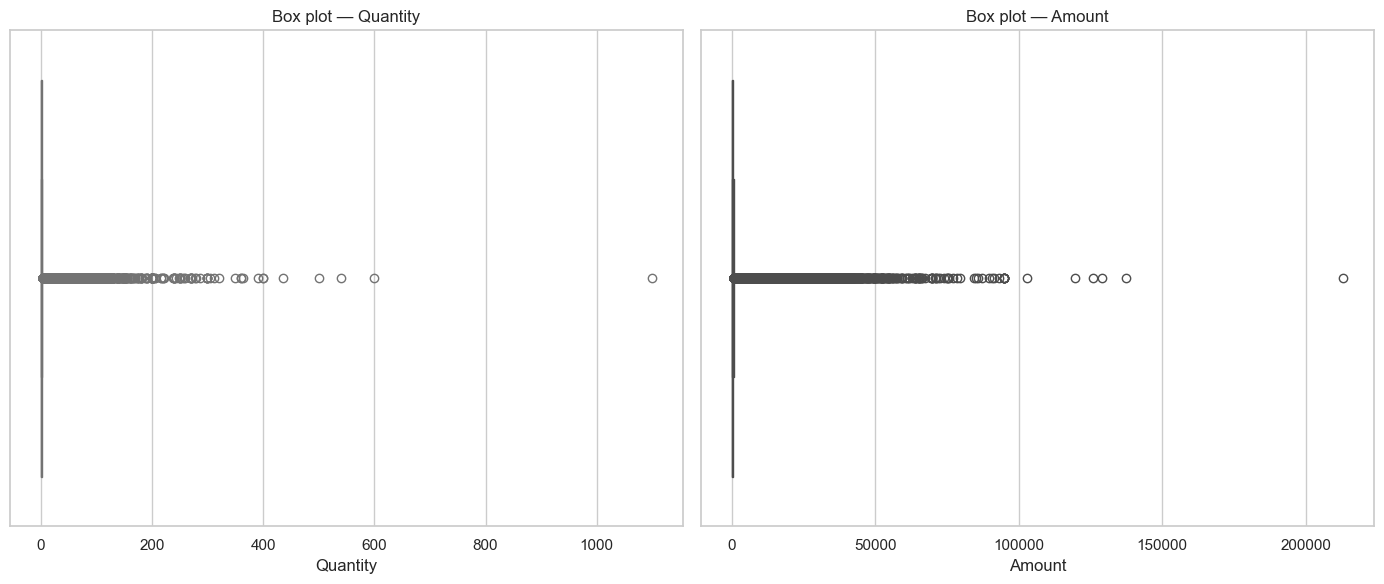

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Убедимся, что seaborn настроен
sns.set(style="whitegrid")

# ========================================
# 1. Гистограммы с KDE (распределения)
# ========================================
fig1, axes1 = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для quantity
sns.histplot(df['quantity'], kde=True, ax=axes1[0], color='skyblue', bins=50)
axes1[0].set_title('Распределение quantity (гистограмма + KDE)')
axes1[0].set_xlabel('Quantity')

# Гистограмма для amount
sns.histplot(df['amount'], kde=True, ax=axes1[1], color='salmon', bins=50)
axes1[1].set_title('Распределение amount (гистограмма + KDE)')
axes1[1].set_xlabel('Amount')

plt.tight_layout()
plt.show()

# ========================================
# 2. Box plot (ящики с усами)
# ========================================
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

# Box plot для quantity
sns.boxplot(x=df['quantity'], ax=axes2[0], color='lightgreen')
axes2[0].set_title('Box plot — Quantity')
axes2[0].set_xlabel('Quantity')

# Box plot для amount
sns.boxplot(x=df['amount'], ax=axes2[1], color='orange')
axes2[1].set_title('Box plot — Amount')
axes2[1].set_xlabel('Amount')

plt.tight_layout()
plt.show()


На основе DataFrame с продажами:
1. Сгруппируй данные по колонке item (товар)
2. Для каждого товара рассчитай сумму двух метрик: - Кол-во:sum(quantity) - Сумма продаж: sum(amount)
3. Отсортируй результат по сумме продаж в убывающем порядке
4. Выведи только ТОП-5 товаров с самыми большими продажами
5. Сохрани результат в переменную 'top_5_products'

In [6]:
# Группировка по товару и расчёт суммарных метрик
top_5_products = (df.groupby('item')
                   .agg(Кол_во=('quantity', 'sum'),
                        Сумма_продаж=('amount', 'sum'))
                   .sort_values(by='Сумма_продаж', ascending=False)
                   .head(5))

# Вывод результата
print("ТОП-5 товаров по сумме продаж:")
print(top_5_products)


ТОП-5 товаров по сумме продаж:
          Кол_во  Сумма_продаж
item                          
sku26161   18902       5373638
sku18199    7250       3951361
sku21947   15304       3918570
sku28128    7705       3027786
sku8342     3512       2113158


Переделай предыдущий код так, чтобы число ТОП товаров было параметром (переменной N). Создай функцию get_top_products(df, n=5), которая:
1. Принимает DataFrame df и параметр n (количество товаров)
2. Выполняет группировку, сортировку и фильтрацию как в предыдущем примере
3. Возвращает DataFrame с n лучшими товарами Протестируй функцию с разными значениями N.

In [7]:
def get_top_products(df, n=5):
    """
    Возвращает ТОП-N товаров по сумме продаж.
    
    Параметры:
        df (pd.DataFrame): DataFrame с колонками 'item', 'quantity', 'amount'
        n (int): Количество топовых товаров для возврата (по умолчанию 5)
    
    Возвращает:
        pd.DataFrame: ТОП-N товаров с суммарным количеством и суммой продаж
    """
    top_products = (df.groupby('item')
                     .agg(Кол_во=('quantity', 'sum'),
                          Сумма_продаж=('amount', 'sum'))
                     .sort_values(by='Сумма_продаж', ascending=False)
                     .head(n))
    return top_products

# Примеры использования:
print("ТОП-5 товаров:")
print(get_top_products(df, n=5))
print("\n" + "="*50)

print("ТОП-3 товара:")
print(get_top_products(df, n=3))
print("\n" + "="*50)

print("ТОП-10 товаров:")
print(get_top_products(df, n=10))


ТОП-5 товаров:
          Кол_во  Сумма_продаж
item                          
sku26161   18902       5373638
sku18199    7250       3951361
sku21947   15304       3918570
sku28128    7705       3027786
sku8342     3512       2113158

ТОП-3 товара:
          Кол_во  Сумма_продаж
item                          
sku26161   18902       5373638
sku18199    7250       3951361
sku21947   15304       3918570

ТОП-10 товаров:
          Кол_во  Сумма_продаж
item                          
sku26161   18902       5373638
sku18199    7250       3951361
sku21947   15304       3918570
sku28128    7705       3027786
sku8342     3512       2113158
sku29626   13669       1973964
sku9018     3299       1706341
sku9471     5045       1675843
sku25074    6125       1668585
sku27791    8384       1645042


На основе исходного DataFrame:
1. Задай переменную end_date = '2019-10-31'
2. Задай переменную period_months = 6
3. Рассчитай начальную дату: start_date = end_date - 6 месяцев
4. Отфильтруй DataFrame так, чтобы осталась только дата >= start_date и дата <= end_date
5. На отфильтрованных данных запусти функцию get_top_products(filtered_df, n=5)
6. Вывести результат

In [8]:
import pandas as pd

# 1. Определяем конечную дату
end_date = pd.Timestamp('2019-10-31')

# 2. Количество месяцев для периода
period_months = 6

# 3. Рассчитываем начальную дату: вычитаем 6 месяцев
start_date = end_date - pd.DateOffset(months=period_months)

# 4. Фильтруем DataFrame по дате (предполагается, что колонка 'tr_date' уже в формате datetime)
filtered_df = df[(df['tr_date'] >= start_date) & (df['tr_date'] <= end_date)]

# 5. Применяем функцию get_top_products к отфильтрованным данным
top_5_recent = get_top_products(filtered_df, n=5)

# 6. Вывод результата
print(f"ТОП-5 товаров за период с {start_date.date()} по {end_date.date()}:")
print(top_5_recent)


ТОП-5 товаров за период с 2019-04-30 по 2019-10-31:
          Кол_во  Сумма_продаж
item                          
sku26161    7993       2379453
sku18199    3066       1848072
sku21947    5831       1543669
sku8342     1509        970053
sku22208      89        896275


На основе исходного DataFrame выполни анализ по клиентам:
1. Сгруппируй данные по client
2. Для каждого клиента рассчитай: - Общее количество товаров (sum(quantity)) - Общую сумму закупок(sum(amount)) - Количество уникальных дат визитов
3. Отсортируй по сумме закупок в убывающем порядке
4. Сохрани результат в переменную 'client_stats’. После этого выведи статистику по столбцам: 
- Для quantity: min, max, mean, median 
- Для amount: min, max, mean, median 
- Для количества дат визитов: min, max, mean

In [9]:
# 1. Группировка по клиенту и расчёт метрик
client_stats = df.groupby('client').agg(
    total_quantity=('quantity', 'sum'),
    total_amount=('amount', 'sum'),
    visit_days=('tr_date', 'nunique')  # количество уникальных дат визитов
).reset_index()

# 2. Сортировка по общей сумме закупок (по убыванию)
client_stats = client_stats.sort_values(by='total_amount', ascending=False)

# Вывод результата (первые 10 клиентов для примера)
print("Топ клиентов по сумме закупок:")
print(client_stats.head(10))
print("\n" + "="*60)

# 3. Статистика по ключевым метрикам
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО КЛИЕНТАМ:")

# Для total_quantity
print("Количество товаров (quantity):")
print(f"  min: {client_stats['total_quantity'].min():.0f}")
print(f"  max: {client_stats['total_quantity'].max():.0f}")
print(f"  mean: {client_stats['total_quantity'].mean():.2f}")
print(f"  median: {client_stats['total_quantity'].median():.0f}")

# Для total_amount
print("\nСумма закупок (amount):")
print(f"  min: {client_stats['total_amount'].min():.2f}")
print(f"  max: {client_stats['total_amount'].max():.2f}")
print(f"  mean: {client_stats['total_amount'].mean():.2f}")
print(f"  median: {client_stats['total_amount'].median():.2f}")

# Для количества визитов
print("\nКоличество уникальных дат визитов:")
print(f"  min: {client_stats['visit_days'].min():.0f}")
print(f"  max: {client_stats['visit_days'].max():.0f}")
print(f"  mean: {client_stats['visit_days'].mean():.2f}")


Топ клиентов по сумме закупок:
            client  total_quantity  total_amount  visit_days
21313  client29182            3434       3887309         107
6283   client15654            5457       1443255         174
41389   client8778            1617        986618          17
7823    client1704            1187        636101          23
25592  client33032            1255        537397          74
30646  client37582            2526        502515         159
11682  client20512            1271        431752          70
38358   client6049            1963        431041          87
22329  client30096            1079        429072         119
23307  client30977            2234        407138         121

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО КЛИЕНТАМ:
Количество товаров (quantity):
  min: 1
  max: 5457
  mean: 52.44
  median: 21

Сумма закупок (amount):
  min: 10.00
  max: 3887309.00
  mean: 14705.66
  median: 6410.00

Количество уникальных дат визитов:
  min: 1
  max: 174
  mean: 6.18


На основе датафрейма client_stats:
1. Отфильтруй клиентов, у которых: - Количество товаров >=2000 ИЛИ - Сумма >= 500000
2. Выведи количество найденных клиентов и их список
3. Покажи эти клиентов с их основными характеристиками
4. Опционально: сохрани их ID для дальнейшего анализа в список 'extreme_clients'

In [10]:
# 1. Фильтрация клиентов по условиям
filtered_clients = client_stats[
    (client_stats['total_quantity'] >= 2000) | 
    (client_stats['total_amount'] >= 500000)
]

# 2. Вывод количества и списка
print(f"Количество клиентов, удовлетворяющих условиям: {len(filtered_clients)}")
print("\nСписок клиентов (с основными характеристиками):")
print(filtered_clients)

# 4. Опционально: сохранение ID клиентов в список
extreme_clients = filtered_clients['client'].tolist()

# Пример вывода списка ID
print("\nID экстремальных клиентов (первые 10):")
print(extreme_clients[:10])


Количество клиентов, удовлетворяющих условиям: 9

Список клиентов (с основными характеристиками):
            client  total_quantity  total_amount  visit_days
21313  client29182            3434       3887309         107
6283   client15654            5457       1443255         174
41389   client8778            1617        986618          17
7823    client1704            1187        636101          23
25592  client33032            1255        537397          74
30646  client37582            2526        502515         159
23307  client30977            2234        407138         121
26757  client34081            2470        386355         157
11458  client20310            3265        366035         102

ID экстремальных клиентов (первые 10):
['client29182', 'client15654', 'client8778', 'client1704', 'client33032', 'client37582', 'client30977', 'client34081', 'client20310']


На основе датафрейма client_stats:
1. Отфильтруй клиентов, у которых количество дат визитов == 1
2. Подсчитай количество таких клиентов
3. Выведи статистику по этим клиентам: 
- Сколько их всего 
- Какой средний чек у них 
- Какой средний объем покупок

In [11]:
# 1. Фильтрация клиентов с количеством визитов == 1
one_time_clients = client_stats[client_stats['visit_days'] == 1]

# 2. Подсчитываем количество таких клиентов
n_one_time = len(one_time_clients)

# 3. Статистика по одноразовым клиентам
if n_one_time > 0:
    avg_amount = one_time_clients['total_amount'].mean()  # средний чек
    avg_quantity = one_time_clients['total_quantity'].mean()  # средний объем покупок
else:
    avg_amount = 0
    avg_quantity = 0

# Вывод результатов
print("АНАЛИЗ ОДНОРАЗОВЫХ КЛИЕНТОВ:")
print(f"Количество клиентов с одним визитом: {n_one_time}")
print(f"Средний чек (средняя сумма покупок): {avg_amount:,.2f}")
print(f"Средний объем покупок (среднее количество товаров): {avg_quantity:,.2f}")


АНАЛИЗ ОДНОРАЗОВЫХ КЛИЕНТОВ:
Количество клиентов с одним визитом: 12859
Средний чек (средняя сумма покупок): 3,535.45
Средний объем покупок (среднее количество товаров): 8.67


Также добавь пункт:
- Доля одноразовых клиентов среди всех клиентов

In [12]:
# 4. Доля одноразовых клиентов среди всех клиентов
total_clients = len(client_stats)
share_one_time = (n_one_time / total_clients) * 100 if total_clients > 0 else 0

print(f"Доля одноразовых клиентов среди всех клиентов: {share_one_time:.2f}%")


Доля одноразовых клиентов среди всех клиентов: 30.08%


На основе исходного DataFrame:
1. Перед расчетом убедись, что нет строк с quantity = 0 (это может привести к делению на 0) - Подсчитай количество таких строк - Если есть, выведи их и удали из DataFrame
2. Создай новый столбец 'price' = amount / quantity
3. Выведи статистику по новому столбцу price: - min, max, mean, median
4. Выведи первые 10 строк исходного DataFrame + новый столбец price

In [13]:
# 1. Проверка и удаление строк с quantity = 0
zero_quantity_rows = df[df['quantity'] == 0]

if len(zero_quantity_rows) > 0:
    print(f"Найдено {len(zero_quantity_rows)} строк с quantity = 0. Удаляем их.")
    # Опционально: вывести первые такие строки
    print("Примеры строк с quantity = 0:")
    print(zero_quantity_rows.head())
    
    # Удаление строк с quantity = 0
    df = df[df['quantity'] != 0].copy()
else:
    print("Строк с quantity = 0 не найдено.")

# 2. Создание столбца 'price' = amount / quantity
df['price'] = df['amount'] / df['quantity']

# 3. Статистика по новому столбцу price
print("\nСТАТИСТИКА ПО СТОЛБЦУ 'price':")
print(f"min:  {df['price'].min():.2f}")
print(f"max:  {df['price'].max():.2f}")
print(f"mean: {df['price'].mean():.2f}")
print(f"median: {df['price'].median():.2f}")

# 4. Вывод первых 10 строк с новым столбцом
print("\nПервые 10 строк с новым столбцом 'price':")
print(df[['tr_date', 'client', 'item', 'quantity', 'amount', 'price']].head(10))


Найдено 1 строк с quantity = 0. Удаляем их.
Примеры строк с quantity = 0:
          tr_date          bcode       client      item        item_group  \
920771 2019-09-14  code000261741  client24307  sku26360  Скобяные изделия   

        quantity  amount  
920771         0       1  

СТАТИСТИКА ПО СТОЛБЦУ 'price':
min:  0.00
max:  119500.00
mean: 389.78
median: 102.89

Первые 10 строк с новым столбцом 'price':
     tr_date       client      item  quantity  amount  price
0 2017-09-01  client13166   sku8444         1      29   29.0
1 2017-09-01  client13166  sku12545         1     329  329.0
2 2017-09-01  client13166   sku3391         1     169  169.0
3 2017-09-01  client13166  sku20444         2     578  289.0
4 2017-09-01   client1239  sku29959         1     329  329.0
5 2017-09-01   client1239  sku19394         4     116   29.0
6 2017-09-01   client1239   sku9916         4     116   29.0
7 2017-09-01   client1239  sku27003         8     392   49.0
8 2017-09-01   client1239  sku15395   

На основе DataFrame с рассчитанной ценой товара:
1. Выведи описательную статистику столбца 'price': - Квартили (25%, 50%, 75%) - Минимум и максимум - Межквартильный диапазон (IQR = Q3 - Q1)
2. Рассчитай границы для потенциальных выбросов: - lower_bound = Q1 - 1.5 * IQR - upper_bound = Q3 + 1.5 * IQR
3. Подсчитай количество выбросов (цены за пределами этих границ)
4. Выведи примеры выбросов (10 самых дорогих и 10 самых дешевых товаров) и создай визуализацию гистограммы и box plot

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ЦЕНЕ:
Минимум:           0.00
25% (Q1):          39.00
50% (медиана):     102.89
75% (Q3):          269.00
Максимум:          119500.00
Межквартильный размах (IQR): 230.00

Границы выбросов:
Нижняя граница (Q1 - 1.5*IQR): -306.00
Верхняя граница (Q3 + 1.5*IQR): 614.00

Общее количество выбросов: 112596
Выбросов ниже нижней границы: 0
Выбросов выше верхней границы: 112596

10 самых дешёвых выбросов (если есть):
Нет выбросов снизу.

10 самых дорогих выбросов (если есть):
            item     price  quantity  amount
734936   sku8449  119500.0         1  119500
242769   sku6834   76990.0         1   76990
847552   sku6834   74990.0         1   74990
153014  sku27261   74990.0         1   74990
713368   sku5775   71991.0         1   71991
766446   sku6834   71241.0         1   71241
704822   sku6834   71241.0         1   71241
222969  sku12045   69990.0         1   69990
624879  sku29862   69990.0         1   69990
753313   sku6834   69741.0         1   69741


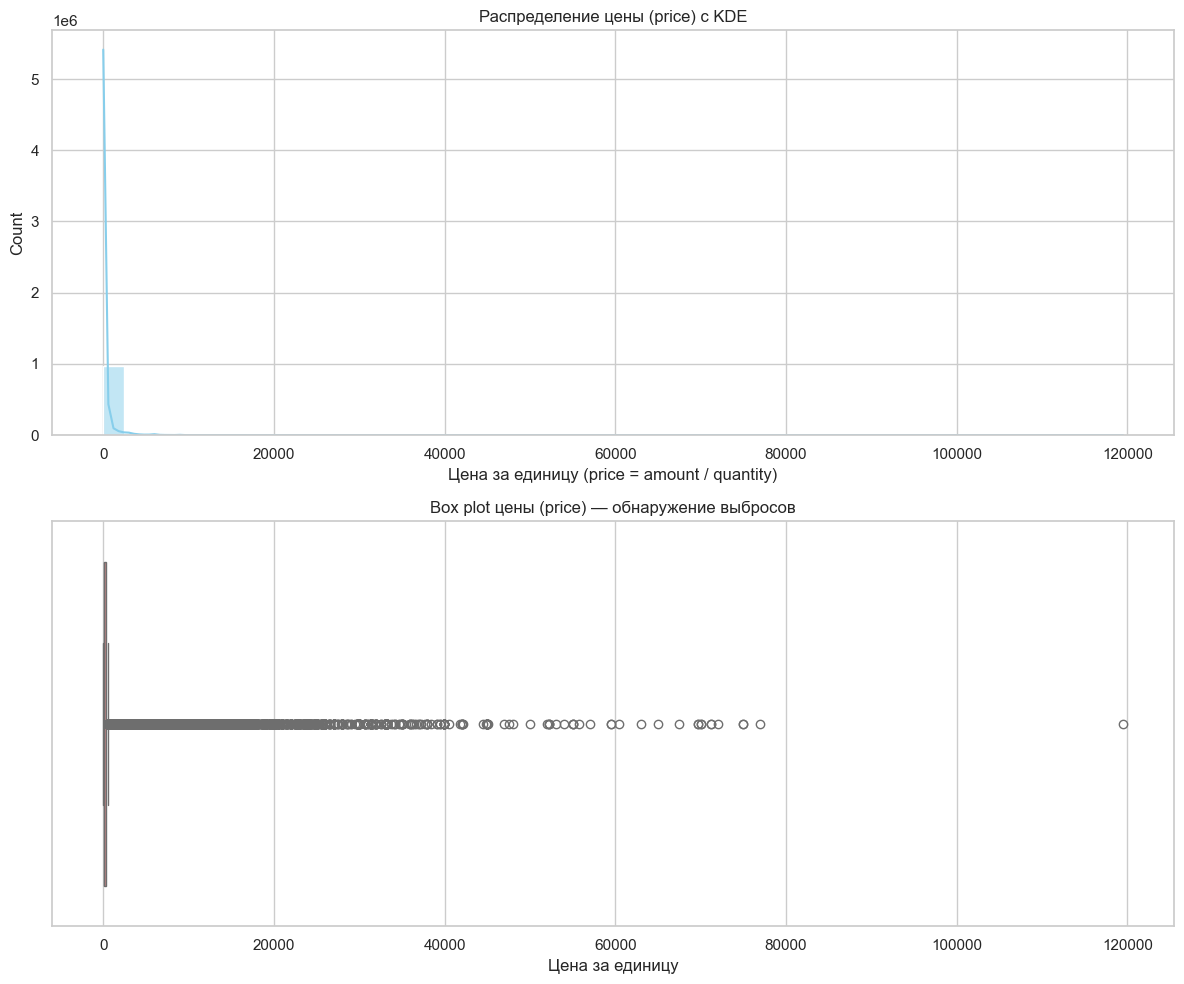

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Описательная статистика по 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
min_val = df['price'].min()
max_val = df['price'].max()
median = df['price'].median()

print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ЦЕНЕ:")
print(f"Минимум:           {min_val:.2f}")
print(f"25% (Q1):          {Q1:.2f}")
print(f"50% (медиана):     {median:.2f}")
print(f"75% (Q3):          {Q3:.2f}")
print(f"Максимум:          {max_val:.2f}")
print(f"Межквартильный размах (IQR): {IQR:.2f}")

# 2. Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nГраницы выбросов:")
print(f"Нижняя граница (Q1 - 1.5*IQR): {lower_bound:.2f}")
print(f"Верхняя граница (Q3 + 1.5*IQR): {upper_bound:.2f}")

# 3. Подсчет выбросов
outliers_low = df[df['price'] < lower_bound]
outliers_high = df[df['price'] > upper_bound]
outliers_count = len(outliers_low) + len(outliers_high)

print(f"\nОбщее количество выбросов: {outliers_count}")
print(f"Выбросов ниже нижней границы: {len(outliers_low)}")
print(f"Выбросов выше верхней границы: {len(outliers_high)}")

# 4. Примеры выбросов
print("\n10 самых дешёвых выбросов (если есть):")
if len(outliers_low) > 0:
    print(outliers_low[['item', 'price', 'quantity', 'amount']].sort_values('price').head(10))
else:
    print("Нет выбросов снизу.")

print("\n10 самых дорогих выбросов (если есть):")
if len(outliers_high) > 0:
    print(outliers_high[['item', 'price', 'quantity', 'amount']].sort_values('price', ascending=False).head(10))
else:
    print("Нет выбросов сверху.")

# 5. Визуализация: гистограмма и boxplot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Гистограмма с KDE
sns.histplot(df['price'], kde=True, ax=axes[0], bins=50, color='skyblue')
axes[0].set_title('Распределение цены (price) с KDE')
axes[0].set_xlabel('Цена за единицу (price = amount / quantity)')

# Box plot
sns.boxplot(x=df['price'], ax=axes[1], color='lightcoral')
axes[1].set_title('Box plot цены (price) — обнаружение выбросов')
axes[1].set_xlabel('Цена за единицу')

plt.tight_layout()
plt.show()


Выполни АВС-анализ товаров по сумме продаж:
1. Сгруппируй данные по item и рассчитай сумму продаж каждого товара
2. Отсортируй товары по сумме продаж в убывающем порядке
3. Рассчитай накопительный процент (cumulative %) для каждого товара: 
- Общая сумма всех продаж = total_sum 
- Для каждого товара: cumulative_sum / total_sum * 100
4. На основе накопительного процента распредели товары на группы: 
- Группа A: cumulative % <= 80% 
- Группа B: cumulative % > 80% and <= 95% 
- Группа C: cumulative % > 95%
5. Выведи количество товаров в каждой группе и примеры товаров из каждой группы

In [15]:
# 1. Группируем по товару и считаем сумму продаж
product_sales = df.groupby('item')['amount'].sum().reset_index()
product_sales.columns = ['item', 'total_sales']

# 2. Сортируем по сумме продаж по убыванию
product_sales = product_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# 3. Рассчитываем накопительный процент
total_sum = product_sales['total_sales'].sum()
product_sales['cumulative_sum'] = product_sales['total_sales'].cumsum()
product_sales['cumulative_percent'] = (product_sales['cumulative_sum'] / total_sum) * 100

# 4. Присваиваем группы A, B, C
def assign_abc_group(cum_percent):
    if cum_percent <= 80:
        return 'A'
    elif cum_percent <= 95:
        return 'B'
    else:
        return 'C'

product_sales['ABC_group'] = product_sales['cumulative_percent'].apply(assign_abc_group)

# 5. Выводим количество товаров в каждой группе
group_counts = product_sales['ABC_group'].value_counts().sort_index()
print("КОЛИЧЕСТВО ТОВАРОВ ПО ГРУППАМ ABC:")
print(f"Группа A (до 80%): {group_counts.get('A', 0)} товаров")
print(f"Группа B (80–95%): {group_counts.get('B', 0)} товаров")
print(f"Группа C (свыше 95%): {group_counts.get('C', 0)} товаров")

# Примеры товаров из каждой группы
print("\nПРИМЕРЫ ТОВАРОВ ИЗ ГРУППЫ A (ТОП-5):")
print(product_sales[product_sales['ABC_group'] == 'A'][['item', 'total_sales', 'cumulative_percent']].head(5))

print("\nПРИМЕРЫ ТОВАРОВ ИЗ ГРУППЫ B (ТОП-5):")
print(product_sales[product_sales['ABC_group'] == 'B'][['item', 'total_sales', 'cumulative_percent']].head(5))

print("\nПРИМЕРЫ ТОВАРОВ ИЗ ГРУППЫ C (ТОП-5):")
print(product_sales[product_sales['ABC_group'] == 'C'][['item', 'total_sales', 'cumulative_percent']].head(5))


КОЛИЧЕСТВО ТОВАРОВ ПО ГРУППАМ ABC:
Группа A (до 80%): 5353 товаров
Группа B (80–95%): 8234 товаров
Группа C (свыше 95%): 16979 товаров

ПРИМЕРЫ ТОВАРОВ ИЗ ГРУППЫ A (ТОП-5):
       item  total_sales  cumulative_percent
0  sku26161      5373638            0.854847
1  sku18199      3951361            1.483435
2  sku21947      3918570            2.106808
3  sku28128      3027786            2.588473
4   sku8342      2113158            2.924637

ПРИМЕРЫ ТОВАРОВ ИЗ ГРУППЫ B (ТОП-5):
          item  total_sales  cumulative_percent
5353  sku10822        22836           80.001791
5354  sku10724        22834           80.005424
5355  sku29015        22826           80.009055
5356  sku26094        22824           80.012686
5357  sku19581        22817           80.016316

ПРИМЕРЫ ТОВАРОВ ИЗ ГРУППЫ C (ТОП-5):
           item  total_sales  cumulative_percent
13587  sku18189         5357           95.000265
13588  sku13438         5357           95.001117
13589    sku872         5357           95.0019

Дополни XYZ-анализ товаров (по количеству): 
Используй для расчета коэффициент вариации = std / mean * 100. На основе коэффициента вариации распредели товары: 
- Группа X: CV < 15% 
- Группа Y: 15% <= CV <= 25% 
- Группа Z: CV > 25%. 
Выведи количество товаров в каждой группе и итоговый датафрейм.

In [16]:
# XYZ-анализ по количеству (quantity) на товар

# 1. Группируем по товару и рассчитываем среднее и стандартное отклонение количества
xyz_data = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()

# Заменяем NaN в std (если std = NaN — значит, только одна покупка)
xyz_data['std'] = xyz_data['std'].fillna(0)

# 2. Рассчитываем коэффициент вариации (CV) в процентах
xyz_data['CV'] = (xyz_data['std'] / xyz_data['mean']) * 100

# Заменяем бесконечные значения (где mean = 0, хотя вряд ли) на 0
xyz_data['CV'] = xyz_data['CV'].replace([float('inf'), -float('inf')], 0)
xyz_data['CV'] = xyz_data['CV'].fillna(0)

# 3. Присваиваем XYZ-группы
def assign_xyz_group(cv):
    if cv < 15:
        return 'X'
    elif 15 <= cv <= 25:
        return 'Y'
    else:
        return 'Z'

xyz_data['XYZ_group'] = xyz_data['CV'].apply(assign_xyz_group)

# 4. Выводим количество товаров в каждой XYZ-группе
xyz_counts = xyz_data['XYZ_group'].value_counts().sort_index()
print("КОЛИЧЕСТВО ТОВАРОВ ПО ГРУППАМ XYZ (по стабильности продаж):")
print(f"Группа X (CV < 15%): {xyz_counts.get('X', 0)} товаров — стабильный спрос")
print(f"Группа Y (15% <= CV <= 25%): {xyz_counts.get('Y', 0)} товаров — умеренно стабильный спрос")
print(f"Группа Z (CV > 25%): {xyz_counts.get('Z', 0)} товаров — нестабильный, случайный спрос")

# 5. Итоговый датафрейм: ABC + XYZ (если нужно объединить — сначала объединим с предыдущим ABC)
# Предположим, что `product_sales` — результат ABC-анализа
abc_xyz_merge = product_sales[['item', 'ABC_group']].merge(
    xyz_data[['item', 'mean', 'std', 'CV', 'XYZ_group']],
    on='item',
    how='inner'
)

print("\nИТОГОВЫЙ ДАТАФРЕЙМ (ABC + XYZ):")
print(abc_xyz_merge.head(10))  # Пример первых 10 строк

# Опционально: сохранение полного результата
# abc_xyz_merge.to_csv('abc_xyz_analysis.csv', index=False)


КОЛИЧЕСТВО ТОВАРОВ ПО ГРУППАМ XYZ (по стабильности продаж):
Группа X (CV < 15%): 11655 товаров — стабильный спрос
Группа Y (15% <= CV <= 25%): 1354 товаров — умеренно стабильный спрос
Группа Z (CV > 25%): 17557 товаров — нестабильный, случайный спрос

ИТОГОВЫЙ ДАТАФРЕЙМ (ABC + XYZ):
       item ABC_group       mean        std          CV XYZ_group
0  sku26161         A   3.141955   4.561518  145.180881         Z
1  sku18199         A   7.011605  10.919571  155.735680         Z
2  sku21947         A   3.163291   3.221318  101.834384         Z
3  sku28128         A  10.300802  20.609304  200.074746         Z
4   sku8342         A  11.986348  14.493024  120.912761         Z
5  sku29626         A  19.416193  35.949685  185.153109         Z
6   sku9018         A   1.522381   1.216739   79.923433         Z
7   sku9471         A   3.265372   3.781705  115.812377         Z
8  sku25074         A   9.196697   8.494955   92.369633         Z
9  sku27791         A  10.287117  14.531370  141.257948 

Создай перекрестную таблицу (pivot table) АВС группа x XYZ группа для матрицы ABC-XYZ

In [17]:
# Создание перекрёстной таблицы (сводной таблицы) ABC × XYZ

# Используем объединённый DataFrame abc_xyz_merge из предыдущего шага
# Он должен содержать колонки: item, ABC_group, XYZ_group

# Построение pivot table: количество товаров в каждой комбинации
abc_xyz_pivot = pd.crosstab(
    index=abc_xyz_merge['ABC_group'],
    columns=abc_xyz_merge['XYZ_group'],
    rownames=['ABC'],
    colnames=['XYZ'],
    margins=True,  # Добавляет итоговые строки и столбцы
    margins_name='Total'
)

# Вывод таблицы
print("МАТРИЦА ABC × XYZ (количество товаров):")
print(abc_xyz_pivot)

# Опционально: визуализация в виде тепловой карты
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.figure(figsize=(8, 6))
#sns.heatmap(
#    abc_xyz_pivot.iloc[:-1, :-1],  # без итогов, чтобы лучше выглядело
#   annot=True,
#    fmt="d",
#    cmap="Blues",
#    cbar=False
#)
#plt.title("Тепловая карта матрицы ABC × XYZ")
#plt.show()


МАТРИЦА ABC × XYZ (количество товаров):
XYZ        X     Y      Z  Total
ABC                             
A       1527   297   3529   5353
B       2562   411   5261   8234
C       7566   646   8767  16979
Total  11655  1354  17557  30566


1. Создай функцию abc_xyz_analysis(df, abc_threshold_a=80, abc_threshold_b=95):
a) Которая выполняет весь АВС-XYZ анализ из предыдущих инструкций
b) Параметры позволяют менять границы групп А и В 2.
Отфильтруй исходный DataFrame за последние 6 месяцев (с 01.05.2019 по 31.10.2019)
2. 3апусти функцию на отфильтрованных данных: abc_xyz_analysis(df_last_6m)
3. Сравни результаты за весь период и за последние 6 месяцев:
a) Сколько товаров перешло из группы в группу?
b) Какие товары стали важнее?
c) Какие - менее важны?
Используй только товары, которые есть в обоих периодах

In [18]:
import pandas as pd

def abc_xyz_analysis(df, abc_threshold_a=80, abc_threshold_b=95):
    """
    Полный ABC-XYZ анализ с настраиваемыми границами.
    
    Параметры:
        df (pd.DataFrame): DataFrame с колонками 'item', 'quantity', 'amount'
        abc_threshold_a (float): верхняя граница для группы A (по умолчанию 80%)
        abc_threshold_b (float): верхняя граница для группы B (по умолчанию 95%)
    
    Возвращает:
        pd.DataFrame: с колонками item, ABC_group, XYZ_group, total_sales, CV
    """
    # ABC-анализ по сумме продаж
    product_sales = df.groupby('item')['amount'].sum().reset_index()
    product_sales.columns = ['item', 'total_sales']
    product_sales = product_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
    
    total_sum = product_sales['total_sales'].sum()
    product_sales['cumulative_percent'] = (product_sales['total_sales'].cumsum() / total_sum) * 100

    def assign_abc(cum_percent):
        if cum_percent <= abc_threshold_a:
            return 'A'
        elif cum_percent <= abc_threshold_b:
            return 'B'
        else:
            return 'C'
    
    product_sales['ABC_group'] = product_sales['cumulative_percent'].apply(assign_abc)
    
    # XYZ-анализ по количеству
    xyz_data = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()
    xyz_data['std'] = xyz_data['std'].fillna(0)
    xyz_data['CV'] = (xyz_data['std'] / xyz_data['mean']) * 100
    xyz_data['CV'] = xyz_data['CV'].replace([float('inf'), -float('inf')], 0).fillna(0)
    
    def assign_xyz(cv):
        if cv < 15:
            return 'X'
        elif 15 <= cv <= 25:
            return 'Y'
        else:
            return 'Z'
    
    xyz_data['XYZ_group'] = xyz_data['CV'].apply(assign_xyz)
    
    # Объединяем результаты
    result = product_sales[['item', 'ABC_group']].merge(
        xyz_data[['item', 'XYZ_group', 'CV']], on='item', how='inner'
    )
    
    return result


# 1. Фильтрация данных за последние 6 месяцев (с 01.05.2019 по 31.10.2019)
# Убедимся, что tr_date — в формате datetime
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', dayfirst=True)

start_date_6m = pd.Timestamp('2019-05-01')
end_date_6m = pd.Timestamp('2019-10-31')

df_last_6m = df[(df['tr_date'] >= start_date_6m) & (df['tr_date'] <= end_date_6m)]

# 2. Запуск анализа для полного периода и последних 6 месяцев
full_analysis = abc_xyz_analysis(df)
recent_analysis = abc_xyz_analysis(df_last_6m)

# 3. Сравнение результатов (только товары, присутствующие в обоих периодах)
common_items = pd.merge(
    full_analysis[['item', 'ABC_group', 'XYZ_group']],
    recent_analysis[['item', 'ABC_group', 'XYZ_group']],
    on='item',
    suffixes=('_full', '_recent')
)

# a) Сколько товаров изменили группы?
common_items['abc_changed'] = common_items['ABC_group_full'] != common_items['ABC_group_recent']
common_items['xyz_changed'] = common_items['XYZ_group_full'] != common_items['XYZ_group_recent']
common_items['any_change'] = common_items['abc_changed'] | common_items['xyz_changed']  


print("\nРЕЗУЛЬТАТЫ СРАВНЕНИЯ (только общие товары):")
print(f"Всего общих товаров: {len(common_items)}")
print(f"Изменили ABC-группу: {common_items['abc_changed'].sum()}")
print(f"Изменили XYZ-группу: {common_items['xyz_changed'].sum()}")
print(f"Изменили хотя бы одну группу: {common_items['any_change'].sum()}")

# b) Какие товары стали важнее (ABC: C→B, B→A и т.д.)
def abc_progress(old, new):
    order = {'A': 0, 'B': 1, 'C': 2}
    return 'улучшился' if order[new] < order[old] else 'ухудшился' if order[new] > order[old] else 'не изменился'

common_items['abc_progress'] = common_items.apply(
    lambda row: abc_progress(row['ABC_group_full'], row['ABC_group_recent']), axis=1
)

improved = common_items[common_items['abc_progress'] == 'улучшился']
declined = common_items[common_items['abc_progress'] == 'ухудшился']

print(f"\nТовары, ставшие важнее (ABC улучшился): {len(improved)}")
if len(improved) > 0:
    print("Примеры (первые 5):")
    print(improved[['item', 'ABC_group_full', 'ABC_group_recent']].head())

print(f"\nТовары, ставшие менее важны (ABC ухудшился): {len(declined)}")
if len(declined) > 0:
    print("Примеры (первые 5):")
    print(declined[['item', 'ABC_group_full', 'ABC_group_recent']].head())

# Сохранение результата сравнения
# common_items.to_csv('abc_xyz_comparison.csv', index=False)



РЕЗУЛЬТАТЫ СРАВНЕНИЯ (только общие товары):
Всего общих товаров: 21767
Изменили ABC-группу: 4302
Изменили XYZ-группу: 4220
Изменили хотя бы одну группу: 7527

Товары, ставшие важнее (ABC улучшился): 1346
Примеры (первые 5):
          item ABC_group_full ABC_group_recent
4521  sku10822              B                A
4522  sku10724              B                A
4532   sku6205              B                A
4533   sku8514              B                A
4538  sku25184              B                A

Товары, ставшие менее важны (ABC ухудшился): 2956
Примеры (первые 5):
         item ABC_group_full ABC_group_recent
6     sku9471              A                C
127   sku8752              A                B
235   sku9350              A                C
250  sku27764              A                B
276   sku6216              A                C


Сохрани результаты анализа в CSV файлы:
1. Результаты ТОП-5 товаров → 'top_5_products.csv' 2.
2. Статистику по клиентам → 'client_statistics.csv’
3. АВС-анализ товаров → 'abc_analysis.csv’
4. XYZ-анализ товаров → 'xyz_analysis.csv’
5. Матрицу ABC-XYZ → 'abc_xyz_matrix.csv’
6. Данные за последние 6 месяцев → 'last_6_months_data.csv’.
Используй method='w', index=False для сохранения без индекса
Проверь, что файлы успешно созданы, выведи первые 5 строк
каждого файла

In [19]:
import os

# 1. Сохранение ТОП-5 товаров
top_5_products.to_csv('top_5_products.csv', index=False)
print("✅ top_5_products.csv сохранён")

# 2. Сохранение статистики по клиентам
client_stats.to_csv('client_statistics.csv', index=False)
print("✅ client_statistics.csv сохранён")

# 3. Сохранение ABC-анализа
product_sales[['item', 'total_sales', 'cumulative_percent', 'ABC_group']].to_csv('abc_analysis.csv', index=False)
print("✅ abc_analysis.csv сохранён")

# 4. Сохранение XYZ-анализа
xyz_data[['item', 'mean', 'std', 'CV', 'XYZ_group']].to_csv('xyz_analysis.csv', index=False)
print("✅ xyz_analysis.csv сохранён")

# 5. Сохранение матрицы ABC-XYZ
abc_xyz_pivot.to_csv('abc_xyz_matrix.csv', index=True)  # index=True, потому что pivot имеет индексы ABC
print("✅ abc_xyz_matrix.csv сохранён")

# 6. Сохранение данных за последние 6 месяцев
df_last_6m.to_csv('last_6_months_data.csv', index=False)
print("✅ last_6_months_data.csv сохранён")

print("\n" + "="*60)
print("ПРОВЕРКА: первые 5 строк каждого файла:\n")

# Функция для чтения и вывода первых строк
def print_head(filename):
    if os.path.exists(filename):
        data = pd.read_csv(filename)
        print(f"📁 {filename} (первые 5 строк):")
        print(data.head())
    else:
        print(f"❌ Файл {filename} не найден!")
    print()

# Проверяем каждый файл
print_head('top_5_products.csv')
print_head('client_statistics.csv')
print_head('abc_analysis.csv')
print_head('xyz_analysis.csv')
print_head('abc_xyz_matrix.csv')
print_head('last_6_months_data.csv')

print("✅ Все файлы успешно проверены.")


✅ top_5_products.csv сохранён
✅ client_statistics.csv сохранён
✅ abc_analysis.csv сохранён
✅ xyz_analysis.csv сохранён
✅ abc_xyz_matrix.csv сохранён
✅ last_6_months_data.csv сохранён

ПРОВЕРКА: первые 5 строк каждого файла:

📁 top_5_products.csv (первые 5 строк):
   Кол_во  Сумма_продаж
0   18902       5373638
1    7250       3951361
2   15304       3918570
3    7705       3027786
4    3512       2113158

📁 client_statistics.csv (первые 5 строк):
        client  total_quantity  total_amount  visit_days
0  client29182            3434       3887309         107
1  client15654            5457       1443255         174
2   client8778            1617        986618          17
3   client1704            1187        636101          23
4  client33032            1255        537397          74

📁 abc_analysis.csv (первые 5 строк):
       item  total_sales  cumulative_percent ABC_group
0  sku26161      5373638            0.854847         A
1  sku18199      3951361            1.483435         A
2  s

Оцени качество реализации кода. Прокомментируй логичность, читаемость, корректность и стиль. 
Предложи конкретные улучшения: оптимизацию, оформление, повышение читаемости, типовые best practices (например, осмысленные имена переменных, применение функций, обработку ошибок и выбор визуализации).


Выполнение заданий 1 практики

На основе датафрейма client_stats: Отфильтруй клиентов, которые потратили 100 рублей и менее за всё время

In [ ]:
''' 1. Убедитесь, что 'tr_date' в формате datetime (если ещё не сделано)
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', dayfirst=True)

# 2. Создаём client_stats (если ещё не создан)
client_stats = df.groupby('client').agg(
    total_quantity=('quantity', 'sum'),
    total_amount=('amount', 'sum'),
    visit_days=('tr_date', 'nunique')
).reset_index()

# 3. Теперь фильтруем клиентов, потративших <= 100 рублей
low_spend_clients = client_stats[client_stats['total_amount'] <= 100]

# 4. Вывод результатов
print(f"Количество клиентов, потративших 100 рублей и менее: {len(low_spend_clients)}")

print("\nСписок этих клиентов:")
print(low_spend_clients[['client', 'total_amount', 'total_quantity', 'visit_days']])'''



Используя уже существующий DataFrame client_stats, напиши код на Python (pandas), который выполнит следующее:

1.Определит клиентов-одновизитников — то есть тех, у кого количество визитов равно 1 (предполагается, что в client_stats есть поле с числом визитов).
2.Рассчитает среднюю сумму покупки среди этих клиентов (предполагается, что в client_stats есть поле со средней или общей суммой покупки клиента).
3.Округлит полученное значение до ближайшего целого и выведет результат.

In [ ]:
'''# Фильтруем клиентов с одним визитом
one_visit = client_stats[client_stats['visit_days'] == 1]

# Считаем среднюю сумму покупки
avg_amount = one_visit['total_amount'].mean()

# Округляем до ближайшего целого
avg_amount_rounded = round(avg_amount)

print(f"Средняя сумма покупки у одновизитника: {avg_amount_rounded} руб.")'''

Напиши код, который выполнит следующее:

1.Используя уже существующие DataFrame-ы с клиентскими транзакциями, вычисли количество визитов каждого клиента.
Под визитом понимается набор всех чеков клиента в пределах одних суток (т.е. нужно агрегировать транзакции клиента по дате).
2.Определи, сколько клиентов совершили более 50 визитов за всё время наблюдения.
3.Выведи итоговое количество таких клиентов.

In [ ]:
''' Извлекаем дату (без времени)
df['date'] = df['tr_date'].dt.date

# Считаем количество уникальных дат визитов для каждого клиента
visit_count = df.groupby('client')['date'].nunique()

# Фильтруем: более 50 визитов
clients_over_50 = visit_count[visit_count > 50]

# Выводим количество таких клиентов
print("Количество клиентов с более чем 50 визитами:", len(clients_over_50))'''


Количество клиентов с более чем 50 визитами: 275


Напиши код, который выполнит следующее:

1.Исключит из набора данных все строки, где значение в столбце Кол-во равно 0.
2.Рассчитает среднюю цену по каждому товару.
3.Определит, сколько товаров имеют среднюю цену 10 рублей или меньше.
4.Выведет количество таких товаров.

In [ ]:
''' 1. Исключить строки, где quantity = 0
df_filtered = df[df['quantity'] != 0].copy()

# 2. Рассчитать среднюю цену по каждому товару: price = amount / quantity
df_filtered['price'] = df_filtered['amount'] / df_filtered['quantity']

# Средняя цена по каждому товару
avg_price_by_item = df_filtered.groupby('item')['price'].mean()

# 3. Определить, сколько товаров имеют среднюю цену <= 10 рублей
cheap_items = avg_price_by_item[avg_price_by_item <= 10]

# 4. Вывести количество таких товаров
print("Количество товаров со средней ценой 10 рублей или меньше:", len(cheap_items))'''


Количество товаров со средней ценой 10 рублей или меньше: 248


Напиши код, который выполнит следующее:

1.Для каждого товара вычислит средневзвешенную цену (взвешивание по количеству, предполагается наличие столбцов вроде Цена и Кол-во).
2.Определит, сколько товаров имеют средневзвешенную цену 10 000 рублей или выше.
3.Выведет итоговое количество таких товаров.

In [ ]:
''' 1. Очищаем данные
df_valid = df[df['quantity'] > 0].copy()
df_valid['price'] = df_valid['amount'] / df_valid['quantity']

# 2. Готовим данные: сумма (price * quantity) и сумма quantity по item
grouped = df_valid.groupby('item').agg(
    weighted_price_numerator=('price', lambda x: (x * df_valid.loc[x.index, 'quantity']).sum()),
    total_quantity=('quantity', 'sum')
)

# 3. Рассчитываем средневзвешенную цену
weighted_avg_price = grouped['weighted_price_numerator'] / grouped['total_quantity']

# 4. Фильтруем товары ≥ 10 000
high_price_items = weighted_avg_price[weighted_avg_price >= 10000]

# 5. Выводим результат
print("Количество товаров со средневзвешенной ценой 10 000 рублей или выше:", len(high_price_items))'''


Количество товаров со средневзвешенной ценой 10 000 рублей или выше: 514
